In [4]:
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException
from selenium import webdriver
import time
import pandas as pd
import numpy as np

In [5]:
def get_jobs(keyword, num_jobs, verbose, path, sleep_time):
    
    '''Gathers jobs as a dataframe, scraped from Glassdoor'''
    
    #Initializing the webdriver
    options = webdriver.ChromeOptions()
    
    #Uncomment the line below if you'd like to scrape without a new Chrome window every time.
    #options.add_argument('headless')
    
    #Change the path to where chromedriver is in your home folder.
    driver = webdriver.Chrome(executable_path=path, options=options)
    driver.set_window_size(1120, 1000)
    
    url = 'https://www.glassdoor.co.uk/Job/jobs.htm?sc.generalKeyword='+keyword
    #url = 'https://www.glassdoor.com/Job/jobs.htm?sc.keyword="' + keyword + '"&locT=C&locId=1147401&locKeyword=San%20Francisco,%20CA&jobType=all&fromAge=-1&minSalary=0&includeNoSalaryJobs=true&radius=100&cityId=-1&minRating=0.0&industryId=-1&sgocId=-1&seniorityType=all&companyId=-1&employerSizes=0&applicationType=0&remoteWorkType=0'
    driver.get(url)
    jobs = []

    while len(jobs) < num_jobs:  #If true, should be still looking for new jobs.

        #Let the page load. Change this number based on your internet speed.
        #Or, wait until the webpage is loaded, instead of hardcoding it.
        time.sleep(sleep_time)

        #Test for the "Sign Up" prompt and get rid of it.
        try:
            driver.find_element_by_class_name("selected").click()
        except ElementClickInterceptedException:
            pass

        time.sleep(.1)

        try:
            driver.find_element_by_css_selector('[alt="Close"]').click()  #clicking to the X.
        except NoSuchElementException:
            pass

        
        #Going through each job in this page
        job_buttons = driver.find_elements_by_class_name("jl")  #jl for Job Listing. These are the buttons we're going to click.
        for job_button in job_buttons:  

            print("Progress: {}".format("" + str(len(jobs)) + "/" + str(num_jobs)))
            if len(jobs) >= num_jobs:
                break

            job_button.click()  #You might 
            time.sleep(1)
            collected_successfully = False
            
            while not collected_successfully:
                try:
                    company_name = driver.find_element_by_xpath('.//div[@class="employerName"]').text
                    location = driver.find_element_by_xpath('.//div[@class="location"]').text
                    job_title = driver.find_element_by_xpath('.//div[contains(@class, "title")]').text
                    job_description = driver.find_element_by_xpath('.//div[@class="jobDescriptionContent desc"]').text
                    collected_successfully = True
                except:
                    time.sleep(5)

            try:
                salary_estimate = driver.find_element_by_xpath('.//span[@class="gray salary"]').text
            except NoSuchElementException:
                salary_estimate = -1 #You need to set a "not found value. It's important."
            
            try:
                rating = driver.find_element_by_xpath('.//span[@class="rating"]').text
            except NoSuchElementException:
                rating = -1 #You need to set a "not found value. It's important."

            #Printing for debugging
            if verbose:
                print("Job Title: {}".format(job_title))
                print("Salary Estimate: {}".format(salary_estimate))
                print("Job Description: {}".format(job_description[:500]))
                print("Rating: {}".format(rating))
                print("Company Name: {}".format(company_name))
                print("Location: {}".format(location))

            #Going to the Company tab...
            #clicking on this:
            #<div class="tab" data-tab-type="overview"><span>Company</span></div>
            try:
                driver.find_element_by_xpath('.//div[@class="tab" and @data-tab-type="overview"]').click()

                try:
                    #<div class="infoEntity">
                    #    <label>Headquarters</label>
                    #    <span class="value">San Francisco, CA</span>
                    #</div>
                    headquarters = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Headquarters"]//following-sibling::*').text
                except NoSuchElementException:
                    headquarters = -1

                try:
                    size = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Size"]//following-sibling::*').text
                except NoSuchElementException:
                    size = -1

                try:
                    founded = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Founded"]//following-sibling::*').text
                except NoSuchElementException:
                    founded = -1

                try:
                    type_of_ownership = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Type"]//following-sibling::*').text
                except NoSuchElementException:
                    type_of_ownership = -1

                try:
                    industry = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Industry"]//following-sibling::*').text
                except NoSuchElementException:
                    industry = -1

                try:
                    sector = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Sector"]//following-sibling::*').text
                except NoSuchElementException:
                    sector = -1

                try:
                    revenue = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Revenue"]//following-sibling::*').text
                except NoSuchElementException:
                    revenue = -1

                try:
                    competitors = driver.find_element_by_xpath('.//div[@class="infoEntity"]//label[text()="Competitors"]//following-sibling::*').text
                except NoSuchElementException:
                    competitors = -1
                    

            except NoSuchElementException:  #Rarely, some job postings do not have the "Company" tab.
                headquarters = -1
                size = -1
                founded = -1
                type_of_ownership = -1
                industry = -1
                sector = -1
                revenue = -1
                competitors = -1

                
            if verbose:
                print("Headquarters: {}".format(headquarters))
                print("Size: {}".format(size))
                print("Founded: {}".format(founded))
                print("Type of Ownership: {}".format(type_of_ownership))
                print("Industry: {}".format(industry))
                print("Sector: {}".format(sector))
                print("Revenue: {}".format(revenue))
                print("Competitors: {}".format(competitors))
                print("@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@")

            jobs.append({"Job Title" : job_title,
            "Salary Estimate" : salary_estimate,
            "Job Description" : job_description,
            "Rating" : rating,
            "Company Name" : company_name,
            "Location" : location,
            "Headquarters" : headquarters,
            "Size" : size,
            "Founded" : founded,
            "Type of ownership" : type_of_ownership,
            "Industry" : industry,
            "Sector" : sector,
            "Revenue" : revenue,
            "Competitors" : competitors})
            #add job to jobs

        #Clicking on the "next page" button
        try:
            driver.find_element_by_xpath('.//li[@class="next"]//a').click()
        except NoSuchElementException:
            print("Scraping terminated before reaching target number of jobs. Needed {}, got {}.".format(num_jobs, len(jobs)))
            break

    return pd.DataFrame(jobs)  #This line converts the dictionary object into a pandas DataFrame.

In [6]:
#This line will open a new chrome window and start the scraping.
path = 'C:/Users/santa/Downloads/chromedriver_win32/chromedriver'
df = get_jobs("data", 5, False, path, 15)
df

Progress: 0/5
Progress: 1/5
Progress: 2/5
Progress: 3/5
Progress: 4/5


ElementClickInterceptedException: Message: element click intercepted: Element <li class="jl react-job-listing gdGrid " data-id="3690665732" data-adv-type="EMPLOYER" data-is-organic-job="false" data-ad-order-id="1044077" data-sgoc-id="1003" data-is-easy-apply="true" data-normalize-job-title="Regional Manager" data-job-loc="Llanelli, Wales" data-job-loc-id="3301558" data-job-loc-type="C" style="border-bottom:0">...</li> is not clickable at point (215, 604). Other element would receive the click: <p id="onetrust-policy-text">...</p>
  (Session info: chrome=85.0.4183.121)


In [14]:
def check_dtype(df):
    lst = []
    lst1 = []
    for i in df:
        dt = df[i].dtypes
        lst.append(i)
        lst1.append(dt)

    df1 = pd.DataFrame(lst)
    df2 = pd.DataFrame(lst1)

    s_lst = pd.concat([df1, df2], axis=1) 
    return s_lst

In [15]:
def unique_values(df):
    for i in df:
        unique = df[i].unique()
        length = len(unique)
        if length > 10:
            print(f'{i}: {length}')
        else:
            print(f'{i}: {unique}')

In [16]:
unique_values(df)

Job Title: 18
Salary Estimate: ['£27K-£63K (Glassdoor Est.)']
Job Description: 20
Rating: 14
Company Name: 20
Location: 12
Headquarters: [-1]
Size: ['201 to 500 Employees' '51 to 200 Employees' '501 to 1000 Employees'
 '1 to 50 Employees' -1 '1001 to 5000 Employees' '10000+ Employees']
Founded: 13
Type of ownership: ['Company - Private' -1 'Nonprofit Organization'
 'Subsidiary or Business Segment' 'Company - Public']
Industry: 14
Sector: ['Telecommunications' 'Business Services' -1 'Finance' 'Education'
 'Retail' 'Manufacturing' 'Information Technology' 'Media']
Revenue: ['Unknown / Non-Applicable' '$5 to $10 million (USD)'
 'Less than $1 million (USD)' -1 '$5 to $10 billion (USD)'
 '$50 to $100 million (USD)' '$10+ billion (USD)'
 '$100 to $500 million (USD)' '$1 to $2 billion (USD)']
Competitors: [-1]


In [9]:
check_dtype(df)


NameError: name 'check_dtype' is not defined

In [70]:
'''
Salary parsing
Company name (text only)
state field
age of company
parsing of job desc
'''
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,Clinical Lead Nurse,£20K-£31K (Glassdoor Est.),"About Us*\nWe are looking for a confident, pas...",2.7,Horizon Care and Education Group Ltd\n2.7,"Sheffield, ENG",-1,201 to 500 Employees,2007,Company - Private,-1,-1,$10 to $25 million (USD),-1
1,SEO Manager,£20K-£31K (Glassdoor Est.),Must have digital marketing agency experience*...,-1,Click Intelligence Ltd,"London, ENG",-1,-1,-1,-1,-1,-1,-1,-1


In [18]:
df['Salary Estimate'].head()

0    £27K-£63K (Glassdoor Est.)
1    £27K-£63K (Glassdoor Est.)
2    £27K-£63K (Glassdoor Est.)
3    £27K-£63K (Glassdoor Est.)
4    £27K-£63K (Glassdoor Est.)
Name: Salary Estimate, dtype: object

In [19]:
df = df[df['Salary Estimate']!= -1]

In [20]:
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])

In [21]:
minus_KP = salary.apply(lambda x: x.replace('K', '').replace('£', ''))

In [22]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['Employer provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)

min_hr = minus_KP.apply(lambda x: x.lower().replace('per hour', '').replace('employer provided salary', ''))

In [23]:
df['min_salary'] = minus_KP.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = minus_KP.apply(lambda x: int(x.split('-')[1]))

In [24]:
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [25]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] == -1 else x['Company Name'][:-3], axis=1)

In [26]:
df['job_city'] = df['Location'].apply(lambda x: x.split(',')[0])

In [27]:
df['same_city'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis=1)

In [28]:
df['age'] = df['Founded'].apply(lambda x: x if x == -1 else 2020-int(x))

In [29]:
df['python'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() or 'r-studio' in x.lower() else 0)

In [30]:
df['python'].value_counts()

1    12
0     8
Name: python, dtype: int64

In [31]:
def title_simp(title):
    if 'data science' in title.lower():
        return 'data scientist'
    elif 'data scientist' in title.lower():
        return 'data scientist'
    elif 'machine learning' in title.lower():
        return 'machine learning'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'engineer' in title.lower():
        return 'engineer'
    elif 'director' in title.lower():
        return 'manager'
    
def senior(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principle' in title.lower():
        return 'senior'
    else:
        return 'na'
    
def na(title):
    if title is None:
        return 'Na'
    else:
        return title

In [32]:
df['Job_simp'] = df['Job Title'].apply(title_simp)

In [33]:
df['Job_simp'].value_counts(dropna=False)

data scientist    7
NaN               7
engineer          3
analyst           2
manager           1
Name: Job_simp, dtype: int64

In [34]:
df['Job_simp'] = df['Job_simp'].apply(na)

In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'same_city', 'age', 'python', 'Job_simp'],
      dtype='object')

In [36]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))

In [69]:
'''df['min_salary'] = ddf.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary)'''

"df['min_salary'] = ddf.apply(lambda x: x.min_salary*2 if x.hourly == 1 else x.min_salary)"

In [37]:
df['company_txt'] = df['company_txt'].apply(lambda x: x.replace('\n', ''))

In [38]:
df.describe()

,Headquarters,Competitors,hourly,Employer provided,min_salary,max_salary,avg_salary,same_city,age,python,desc_len
count,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.000000,20.000000,20.000000
mean,-1.0,-1.0,0.0,0.0,27.0,63.0,45.0,0.0,27.500000,0.600000,4270.950000
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41.417642,0.502625,1812.468932
min,-1.0,-1.0,0.0,0.0,27.0,63.0,45.0,0.0,-1.000000,0.000000,453.000000
25%,-1.0,-1.0,0.0,0.0,27.0,63.0,45.0,0.0,3.500000,0.000000,3733.250000
50%,-1.0,-1.0,0.0,0.0,27.0,63.0,45.0,0.0,19.000000,1.000000,4243.000000
75%,-1.0,-1.0,0.0,0.0,27.0,63.0,45.0,0.0,27.250000,1.000000,4864.500000
max,-1.0,-1.0,0.0,0.0,27.0,63.0,45.0,0.0,162.000000,1.000000,8365.000000


In [2]:

import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
grid = sns.FacetGrid(df, row='', col='')
grid.map(plt.hist)
grid.add_legend()

KeyError: ''

In [41]:
df['Rating'] = df['Rating'].apply(lambda x: 1 if x == 0 else x)

C:\Users\santa\miniconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


TypeError: can only concatenate str (not "int") to str

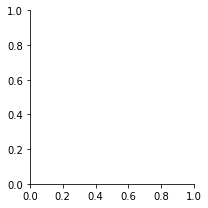

In [42]:
grid = sns.FacetGrid(df, height=3)
grid.map(sns.boxplot, 'Rating')
grid.add_legend()

In [43]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'same_city', 'age', 'python', 'Job_simp',
       'desc_len'],
      dtype='object')

In [44]:
df.Rating = df.Rating.astype(float)

In [45]:
df[['age', 'avg_salary', 'Rating', 'desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,NaN,0.209335,0.260273
avg_salary,NaN,NaN,NaN,NaN
Rating,0.209335,NaN,1.000000,0.496298
desc_len,0.260273,NaN,0.496298,1.000000


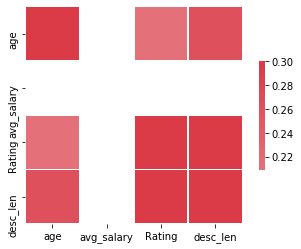

In [46]:
cmap = sns.diverging_palette(220, 10 , as_cmap=True)
sns.heatmap(df[['age', 'avg_salary', 'Rating', 'desc_len']].corr(), vmax=.3, center=0, cmap=cmap,
           square=True, linewidth=.5, cbar_kws={'shrink': .5})

In [47]:
df_cat = df[['Location', 'Size', 'job_city', 'Industry', 'Sector', 'company_txt']]

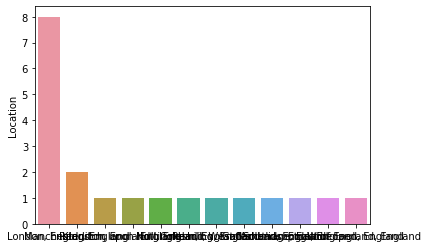

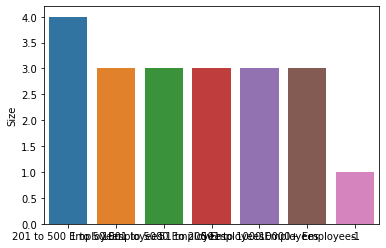

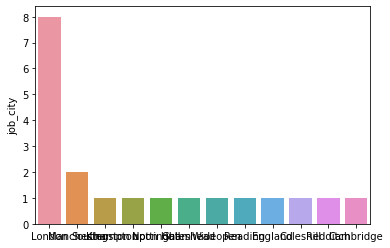

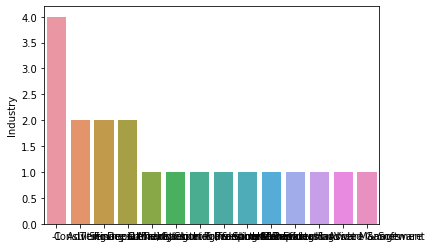

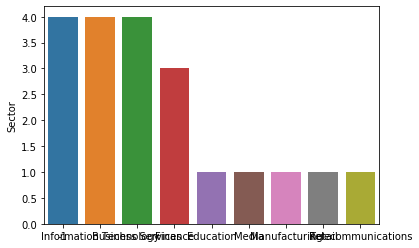

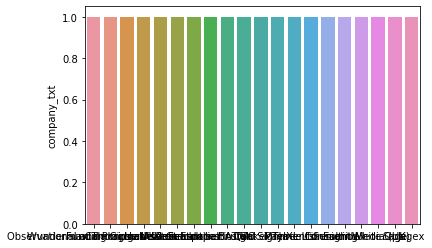

In [48]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    sns.barplot(x=cat_num.index, y=cat_num)
    plt.show()

C:\Users\santa\miniconda3\envs\tensorflow\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


'\nfor ax in g.axes.flat:\n    for label in ax.get_yticklabels():\n        label.set_rotation(0)'

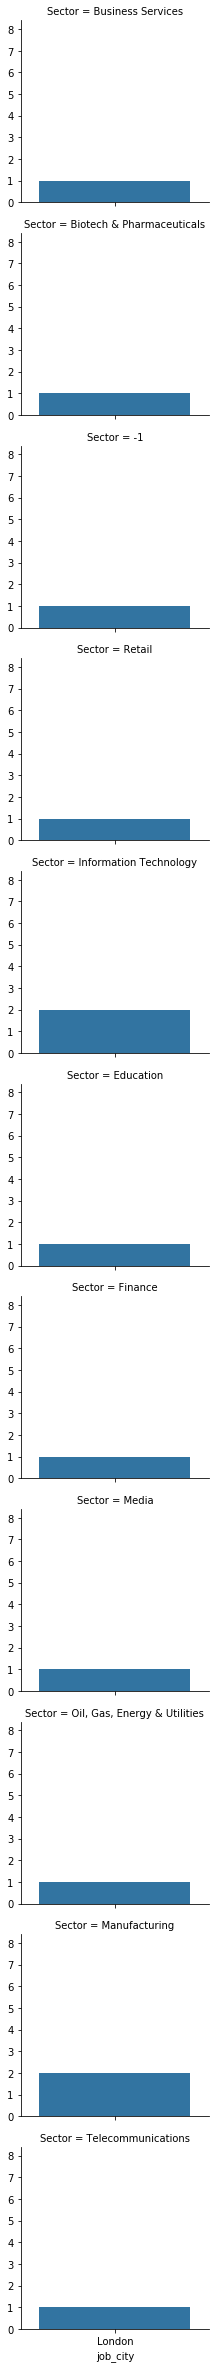

In [280]:
grid = sns.FacetGrid(df, row ='Sector')
grid.map(sns.countplot, 'job_city')
grid.add_legend()


"""
for ax in g.axes.flat:
    for label in ax.get_yticklabels():
        label.set_rotation(0)"""

In [49]:
df_cat['Industry'].value_counts()

-1                                       4
Consulting                               2
IT Services                              2
Advertising & Marketing                  2
Lending                                  1
Financial Transaction Processing         1
Department, Clothing, & Shoe Stores      1
Cable, Internet & Telephone Providers    1
Consumer Products Manufacturing          1
Internet                                 1
K-12 Education                           1
Investment Banking & Asset Management    1
Computer Hardware & Software             1
Video Games                              1
Name: Industry, dtype: int64

In [50]:
df_cat.columns

Index(['Location', 'Size', 'job_city', 'Industry', 'Sector', 'company_txt'], dtype='object')

Graph for Location: Total = 12


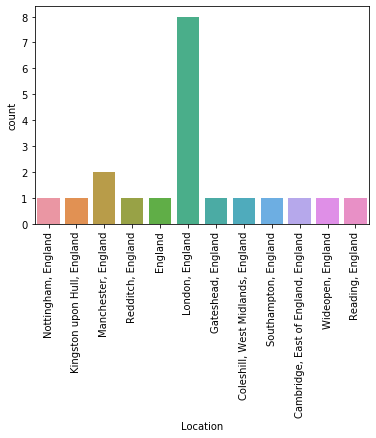

Graph for Size: Total = 7


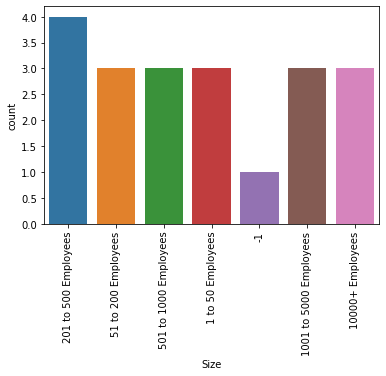

Graph for job_city: Total = 12


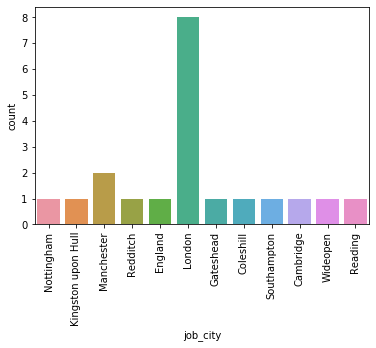

Graph for Industry: Total = 14


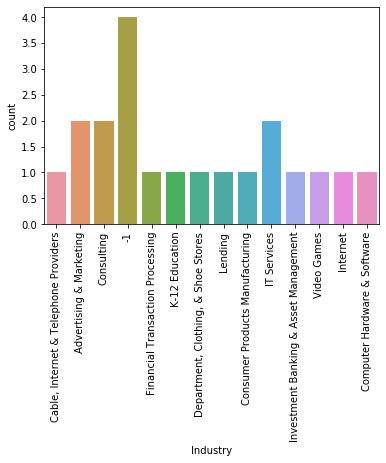

Graph for Sector: Total = 9


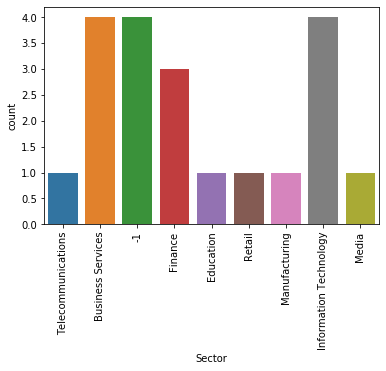

Graph for company_txt: Total = 20


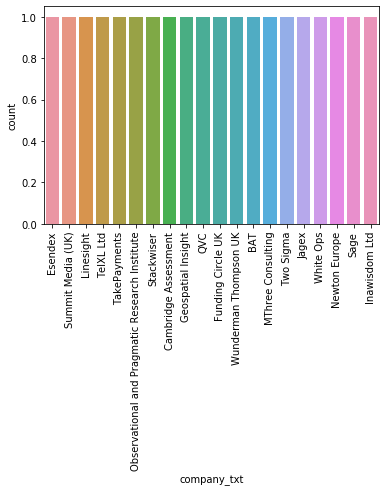

In [51]:
for i in df_cat:
    chart = sns.countplot(x=i, data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    print(f'Graph for {i}: Total = {len(df_cat[i].value_counts())}')
    plt.show()

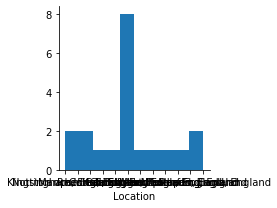

In [52]:
grid = sns.FacetGrid(df)
grid.map(plt.hist, 'Location')
grid.add_legend()

In [53]:
pd.pivot_table(df, index = 'Job_simp', values='avg_salary')

df.groupby(df['Job_simp'])['avg_salary'].mean()

df['avg_salary'][df['Job_simp'] == 'Na'].mean()

45.0

In [ ]:
pd.pivot_table(df, index = ['Job_simp', 'ANOTHER COLUMN'], values='avg_salary') -- Same as groupby

In [57]:
pd.pivot_table(df[df['job_city']=='London'], index = ['job_city', 'Job_simp'], values='avg_salary', aggfunc='count').sort_values('avg_salary', ascending=False)

avg_salary
job_city Job_simp                  
London   Na                       3
         data scientist           3
         engineer                 2

In [56]:
df[df['job_city']=='London'].groupby(df['Job_simp'])['avg_salary'].count()

Job_simp
Na                3
data scientist    3
engineer          2
Name: avg_salary, dtype: int64

In [58]:
pd.pivot_table(df[df['Job_simp']=='data scientist'], index = 'job_city', values='avg_salary').sort_values('avg_salary', ascending=False)

,avg_salary
job_city,
Cambridge,45.0
Kingston upon Hull,45.0
London,45.0
Reading,45.0
Southampton,45.0


In [63]:
df.head(1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,min_salary,max_salary,avg_salary,company_txt,job_city,same_city,age,python,Job_simp,desc_len
0,Senior Data Analyst,£27K-£63K (Glassdoor Est.),"*please note this is a fixed term, 12 month co...",4.6,Esendex\n4.6,"Nottingham, England",-1,201 to 500 Employees,2001,Company - Private,...,27,63,45.0,Esendex,Nottingham,0,19,0,analyst,4792


In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'Employer provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_city', 'same_city', 'age', 'python', 'Job_simp',
       'desc_len'],
      dtype='object')

In [69]:
df_pivot_new = df[['Rating', 'Industry', 'Sector', 'Revenue', 'hourly', 'python', 'avg_salary']]

In [104]:
for i in df_pivot_new.columns:
    print(i)
    print(pd.pivot_table(df_pivot_new, index=i, values='avg_salary').sort_values('avg_salary', ascending=False))

Rating
        avg_salary
Rating            
-1.0          45.0
 3.1          45.0
 3.3          45.0
 3.5          45.0
 3.6          45.0
 3.8          45.0
 3.9          45.0
 4.0          45.0
 4.1          45.0
 4.2          45.0
 4.3          45.0
 4.6          45.0
 4.7          45.0
 4.8          45.0
Industry
                                       avg_salary
Industry                                         
-1                                           45.0
Advertising & Marketing                      45.0
Cable, Internet & Telephone Providers        45.0
Computer Hardware & Software                 45.0
Consulting                                   45.0
Consumer Products Manufacturing              45.0
Department, Clothing, & Shoe Stores          45.0
Financial Transaction Processing             45.0
IT Services                                  45.0
Internet                                     45.0
Investment Banking & Asset Management        45.0
K-12 Education                

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [89]:
for i in df_pivot_new.columns:
    print(i)
    print('--------------')
    print(df_pivot_new.groupby(df_pivot_new[i])['avg_salary'].mean())
    print('\n')

Rating
--------------
Rating
-1.0    45.0
 3.1    45.0
 3.3    45.0
 3.5    45.0
 3.6    45.0
 3.8    45.0
 3.9    45.0
 4.0    45.0
 4.1    45.0
 4.2    45.0
 4.3    45.0
 4.6    45.0
 4.7    45.0
 4.8    45.0
Name: avg_salary, dtype: float64


Industry
--------------
Industry
-1                                       45.0
Advertising & Marketing                  45.0
Cable, Internet & Telephone Providers    45.0
Computer Hardware & Software             45.0
Consulting                               45.0
Consumer Products Manufacturing          45.0
Department, Clothing, & Shoe Stores      45.0
Financial Transaction Processing         45.0
IT Services                              45.0
Internet                                 45.0
Investment Banking & Asset Management    45.0
K-12 Education                           45.0
Lending                                  45.0
Video Games                              45.0
Name: avg_salary, dtype: float64


Sector
--------------
Sector
-1           

In [94]:
df_pivot_new.groupby(df_pivot_new['Industry'])['avg_salary'].mean()

Industry
-1                                       45.0
Advertising & Marketing                  45.0
Cable, Internet & Telephone Providers    45.0
Computer Hardware & Software             45.0
Consulting                               45.0
Consumer Products Manufacturing          45.0
Department, Clothing, & Shoe Stores      45.0
Financial Transaction Processing         45.0
IT Services                              45.0
Internet                                 45.0
Investment Banking & Asset Management    45.0
K-12 Education                           45.0
Lending                                  45.0
Video Games                              45.0
Name: avg_salary, dtype: float64

In [111]:
pd.pivot_table(df_pivot_new, index='Revenue', columns='python', values='avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
-1,1.0,NaN
$1 to $2 billion (USD),NaN,1.0
$10+ billion (USD),NaN,1.0
$100 to $500 million (USD),NaN,1.0
$5 to $10 billion (USD),NaN,1.0
$5 to $10 million (USD),NaN,1.0
$50 to $100 million (USD),NaN,2.0
Less than $1 million (USD),2.0,1.0
Unknown / Non-Applicable,5.0,4.0


In [109]:
df_pivot_new

,Rating,Industry,Sector,Revenue,hourly,python,avg_salary
0,4.6,"Cable, Internet & Telephone Providers",Telecommunications,Unknown / Non-Applicable,0,0,45.0
1,3.5,Advertising & Marketing,Business Services,$5 to $10 million (USD),0,1,45.0
2,4.3,Consulting,Business Services,Unknown / Non-Applicable,0,0,45.0
3,4.0,-1,-1,Less than $1 million (USD),0,0,45.0
4,4.8,Financial Transaction Processing,Finance,Unknown / Non-Applicable,0,1,45.0
5,3.1,-1,-1,Less than $1 million (USD),0,0,45.0
6,-1.0,-1,-1,-1,0,0,45.0
7,3.8,K-12 Education,Education,Unknown / Non-Applicable,0,0,45.0
8,-1.0,-1,-1,Less than $1 million (USD),0,1,45.0
9,3.3,"Department, Clothing, & Shoe Stores",Retail,$5 to $10 billion (USD),0,1,45.0


In [119]:
import wordcloud
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'wordcloud'

In [121]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

ModuleNotFoundError: No module named 'nltk'

In [ ]:
df_model =df[['avg_salary', 'Rating', 'Size', 'Type of ownership', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 
             'employer_provided', 'job_city', 'same_city', 'age', 'python', 'job_simp', 'desc_len']]

In [ ]:
df_dum = pd.get_dummies(df_model)

In [ ]:
from sklearn.model_selection import train_test_split
X = df_dum.drop('avg_salary', axis=1)
y = df_dum['avg_salary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
import statsmodels.api as sm
X_sm = X = sm.add_constant(X)
model = sm.OLS(y, X_sm)
model.fit().summary()

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
lm = LinearRegression()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lm, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))\

In [ ]:
lml = Lasso()
lm.fit(X_train, y_train)
np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

In [ ]:
alpha = []
error = []
for i in range(1,100):
    alpha.append(i/100)
    lml = lasso(alpha=(i/10))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring='neg_mean_absolute_error', cv=3)))
    
plt.plot(alpha, error)

err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, colums =['Alpha', 'Error'])

df_err[df_err.error == max(df_error.error)]

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()

np.mean(cross_val_score(rf, X_train, y_train, scoring='neg_mean_absolute_error', cv=3))

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': range(10,300,10), 
              'criterion': ('mse', 'mae'),
              'max_features': ('auto', 'log2')}

gs = GridSearchCV(rf, parameters=parameters, X_train, y_train, cv=3, scoring='neg_mean_absolute_error')
gs.fit(X_train, y_train)

In [ ]:
pred_l = lm.predict(x_test)
pred_lm = lml.predict(x_test)
pred_rf = rf.best_estimator_.predict(x_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, pred_l)
mean_absolute_error(y_test, pred_lm)
mean_absolute_error(y_test, pred_rf)

In [ ]:
mean_absolute_error((y_test + pred_rf)/2)

In [ ]:
Turn it into an API end point using Flask, this is known as productionisation, with an api endpoint we can have a website reach
out to it and get back a respose. 
Website would send info about a job and our API endpoint will return an expected salary.

Flask is a web frame work, creates a web server on our local computer

In [ ]:
rf.best_estimator_

In [ ]:
import pickle
pickl = {'model': gs.best_estimator_}
pickle.dump(pickl, open ('model_file' + '.p', 'wb'))

file_name = 'model_file.p'
with open(file_name, 'rb') as pickled:
    data = pickle.load(pickled)
    model = data['model']